Using TensorFlow backend.
C:\Users\anany\AppData\Roaming\Python\Python38\site-packages\keras\backend\tensorflow_backend.py:3111: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if training is 1 or training is True:
C:\Users\anany\AppData\Roaming\Python\Python38\site-packages\keras\backend\tensorflow_backend.py:3117: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif training is 0 or training is False:


Class: Very Mild


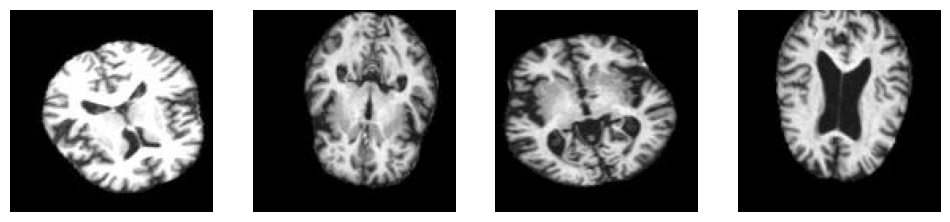

Class: Mild


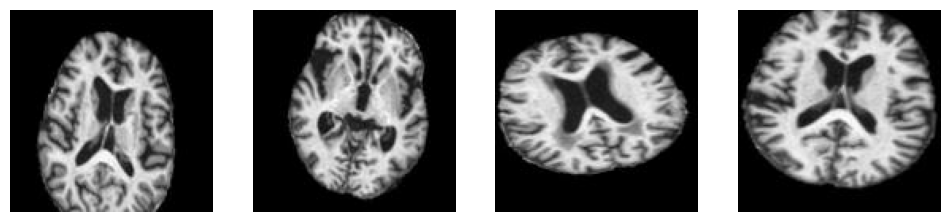

Class: Moderate


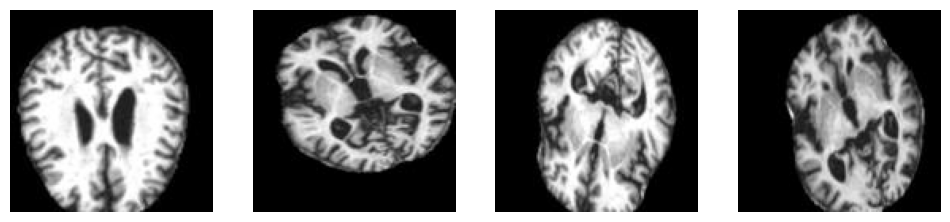

Class: Non


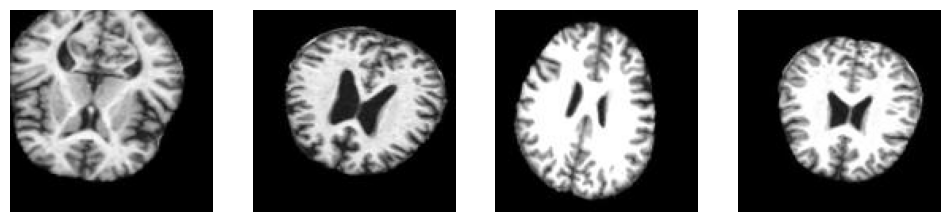

In [1]:
import os
import numpy as np
import random
from glob import glob
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img, save_img
import matplotlib.pyplot as plt

# Define the source directory for each class
class_directories = {
    'Very Mild': 'C:/Users/anany/Desktop/VIT/RESEARCH/sem 7-3 cloud maam/project/dataset/Very_Mild_Demented/',
    'Mild': 'C:/Users/anany/Desktop/VIT/RESEARCH/sem 7-3 cloud maam/project/dataset/Mild_Demented/',
    'Moderate': 'C:/Users/anany/Desktop/VIT/RESEARCH/sem 7-3 cloud maam/project/dataset/Moderate_Demented/',
    'Non': 'C:/Users/anany/Desktop/VIT/RESEARCH/sem 7-3 cloud maam/project/dataset/Non_Demented/'
}

# Define an output directory
output_dir = 'path_to_output_directory'  # Replace with your desired output directory
os.makedirs(output_dir, exist_ok=True)

# Initialize the ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.7, 1.3),
    fill_mode='nearest'
)

# Function to apply random augmentations to a class of images
def augment_class(class_name, class_path, output_path, num_augmentations=4000):
    image_files = glob(os.path.join(class_path, '*.jpg'))
    
    for i in range(num_augmentations):
        # Choose a random image from the class
        image_path = random.choice(image_files)
        image = load_img(image_path)
        image = img_to_array(image)
        image = image.reshape((1,) + image.shape)
        
        # Apply random augmentations using datagen
        for batch in datagen.flow(image, batch_size=1):
            augmented_image = array_to_img(batch[0], scale=False)
            break  # Exit the loop after one augmentation
        
        # Save the augmented image
        output_filename = f"{class_name}_{i}.jpg"
        output_image_path = os.path.join(output_path, output_filename)
        save_img(output_image_path, augmented_image)

# Augment each class separately
for class_name, class_path in class_directories.items():
    class_output_path = os.path.join(output_dir, class_name)
    os.makedirs(class_output_path, exist_ok=True)
    
    augment_class(class_name, class_path, class_output_path)

# Display 4 random augmented images from each class using Matplotlib
for class_name in class_directories:
    class_output_path = os.path.join(output_dir, class_name)
    augmented_images = glob(os.path.join(class_output_path, '*.*'))
    
    print(f"Class: {class_name}")
    plt.figure(figsize=(12, 4))
    for i in range(4):
        random_image_path = random.choice(augmented_images)
        image = plt.imread(random_image_path)
        plt.subplot(1, 4, i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()


In [4]:
# import os
# import random
# import numpy as np
# from sklearn.model_selection import train_test_split
# from keras.preprocessing.image import load_img, img_to_array
# from keras.applications import Xception
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
# import matplotlib.pyplot as plt
# from xgboost import XGBClassifier

# # Define the paths to the class folders
# class_folders = {
#     'Very Mild': 'C:/Users/anany/Desktop/VIT/RESEARCH/sem 7-3 cloud maam/project/augdat/Very Mild/',
#     'Mild': 'C:/Users/anany/Desktop/VIT/RESEARCH/sem 7-3 cloud maam/project/augdat/Mild/',
#     'Moderate': 'C:/Users/anany/Desktop/VIT/RESEARCH/sem 7-3 cloud maam/project/augdat/Moderate/',
#     'Non': 'C:/Users/anany/Desktop/VIT/RESEARCH/sem 7-3 cloud maam/project/augdat/Non/',
# }

# # Load and preprocess the image data
# data = []
# labels = []
# for class_name, folder_path in class_folders.items():
#     for img_file in os.listdir(folder_path):
#         img_path = os.path.join(folder_path, img_file)
#         img = image.load_img(img_path, target_size=(128, 128))
#         img = image.img_to_array(img)
#         img = preprocess_input(img)
#         data.append(img)
#         labels.append(class_name)
# data = np.array(data)
# labels = np.array(labels)
# # Convert class labels to one-hot encoding
# label_dict = {class_name: i for i, class_name in enumerate(class_folders.keys())}
# labels = to_categorical([label_dict[label] for label in labels])

# # Split the data into training and testing sets (80%-20% split)
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# # Load the pre-trained Xception model
# base_model = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# # Extract features from the Xception model
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# predictions = Dense(4, activation='softmax')(x)
# xception_model = Model(inputs=base_model.input, outputs=predictions)

# # Train each classifier on the extracted features
# classifiers = [
#     ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
#     ('XGBoost', XGBClassifier(n_estimators=100, random_state=42)),
#     ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
#     ('SVM', SVC(probability=True, random_state=42))
# ]

# for name, clf in classifiers:
#     clf.fit(X_train_features, y_train)

# # Create an ensemble of classifiers with the Xception model as input
# ensemble_models = [(name, clf) for name, clf in classifiers]
# ensemble_models.append(('Xception', xception_model))

# ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

# # Train the ensemble model
# ensemble.fit(X_train, y_train)

# # Predict using the ensemble model
# y_pred = ensemble.predict(X_test)

# # Evaluate the ensemble model
# accuracy = accuracy_score(y_test, y_pred)
# confusion = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, ensemble.predict_proba(X_test), average='macro')

# print(f'Ensemble Model Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{confusion}')
# print(f'Classification Report:\n{classification_rep}')
# print(f'ROC AUC Score: {roc_auc}')

# # Plot ROC curve
# fpr, tpr, _ = roc_curve(y_test, ensemble.predict_proba(X_test)[:, 1])
# roc_auc_ensemble = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ensemble:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.show()


import os
import random
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.applications import Xception
from keras.layers import GlobalAveragePooling2D, Dense, Input
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.applications.xception import preprocess_input

# Define the paths to the class folders
class_folders = {
    'Very Mild': 'C:/Users/anany/Desktop/VIT/RESEARCH/sem 7-3 cloud maam/project/augdat/Very Mild/',
    'Mild': 'C:/Users/anany/Desktop/VIT/RESEARCH/sem 7-3 cloud maam/project/augdat/Mild/',
    'Moderate': 'C:/Users/anany/Desktop/VIT/RESEARCH/sem 7-3 cloud maam/project/augdat/Moderate/',
    'Non': 'C:/Users/anany/Desktop/VIT/RESEARCH/sem 7-3 cloud maam/project/augdat/Non/',
}

# Load and preprocess the image data
data = []
labels = []
for class_name, folder_path in class_folders.items():
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = image.load_img(img_path, target_size=(128, 128))
        img = image.img_to_array(img)
        img = preprocess_input(img)
        data.append(img)
        labels.append(class_name)
data = np.array(data)
labels = np.array(labels)
# Convert class labels to one-hot encoding
label_dict = {class_name: i for i, class_name in enumerate(class_folders.keys())}
labels = to_categorical([label_dict[label] for label in labels])

# Split the data into training and testing sets (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Load the pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False)
#input_shape=(128, 128, 3)
# Extract features from the Xception model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)
xception_model = Model(inputs=base_model.input, outputs=predictions)

# Train each classifier on the extracted features
classifiers = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, random_state=42)),
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('SVM', SVC(probability=True, random_state=42))
]

for name, clf in classifiers:
    clf.fit(X_train_features, y_train)

# Create an ensemble of classifiers with the Xception model as input
ensemble_models = [(name, clf) for name, clf in classifiers]
ensemble_models.append(('Xception', xception_model))

ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Predict using the ensemble model
y_pred = ensemble.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, ensemble.predict_proba(X_test), average='macro')

print(f'Ensemble Model Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, ensemble.predict_proba(X_test)[:, 1])
roc_auc_ensemble = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


TypeError: Input() got multiple values for argument 'shape'

In [ ]:
# Create lists to store training and validation loss per epoch
training_loss = []
validation_loss = []

# Train the ensemble model and record the loss per epoch
num_epochs = 10  # Adjust as needed
for epoch in range(num_epochs):
    ensemble.fit(X_train, y_train)
    y_train_pred = ensemble.predict(X_train)
    y_val_pred = ensemble.predict(X_test)
    
    train_loss = log_loss(y_train, y_train_pred)  # Replace with your loss calculation for training data
    val_loss = log_loss(y_test, y_val_pred)  # Replace with your loss calculation for validation data
    
    training_loss.append(train_loss)
    validation_loss.append(val_loss)
    
    print(f'Epoch {epoch + 1}/{num_epochs} - Train Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f}')

# Plot the loss per epoch
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), validation_loss, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()